<a href="https://colab.research.google.com/github/Kalebe-Nascimento/Data-Mining-Candy-Rank/blob/main/Candy_Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mineração de Dados

O objetivo deste trabalho é aplicar técnicas de mineração de dados para explorar e analisar informações valiosas sobre a popularidade de doces de Halloween. Por meio de um confronto direto entre diferentes doces, buscamos identificar qual deles se destaca como o favorito entre os consumidores. Essa análise permitirá compreender quais características tornam um doce mais desejado, utilizando dados de ranking para definir o campeão entre os doces de Halloween.


### Base de Dados

Base de dados disponível em: free Data Sets & Dataset Samples <
https://mavenanalytics.io/data-playground?accessType=open&order=date_added%2Cdesc >


#Importação das bibliotecas inicias e adição do google drive ao projeto

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Algumas configurações do notebook para leitura

In [3]:
warnings.filterwarnings('ignore')
%config IPCompleter.greedy = True
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.precision = 2

Importação do chardet e criação do path para idicar a base dados *(candy-data.cvs)* salva no google colab

In [4]:
import chardet

candy_rank = open('/content/drive/MyDrive/Colab Notebooks/P2-MineracaoDados/candy-data.csv', 'rb').read()
result = chardet.detect(candy_rank)
charenc = result['encoding']
print(charenc)
print(result)

ascii
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


Adicionando a nossa base de dados e mostrando seu shape



In [5]:
candy_rank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/P2-MineracaoDados/candy-data.csv', encoding='utf-8')
candy_rank.drop_duplicates(inplace=True)
candy_rank.shape

(85, 13)

mostrando o cabeçalho da nossa base de dados

In [6]:
candy_rank.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.73,0.86,66.97
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.60,0.51,67.60
2,One dime,0,0,0,0,0,0,0,0,0,0.01,0.12,32.26
3,One quarter,0,0,0,0,0,0,0,0,0,0.01,0.51,46.12
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,52.34


Categóricas (9 variáveis) São geralmente variáveis binárias com valores 0 (ausente) e 1 (presente).


*  chocolate
*  fruity
*  caramel
*  peanutalmondy
*  nougat
* crispedricewafer
* hard
*  bar
*  pluribus




Numéricas (3 variáveis)



*   sugarpercent: Percentil de açúcar.
*   pricepercent: Percentil do preço.
*    winpercent: Percentual de vitórias.




Checando se existe valores vazios

In [7]:
(candy_rank.isnull().sum()/len(candy_rank)*100).sort_values(ascending=False)

,0
competitorname,0.0
chocolate,0.0
fruity,0.0
caramel,0.0
peanutyalmondy,0.0
nougat,0.0
crispedricewafer,0.0
hard,0.0
bar,0.0
pluribus,0.0


Temos um total de 12 variáveis ​​que descrevem um doce de halloween. 9 delas são categóricas e as demais, ou seja, 3 são variáveis ​​numéricas.

1 = sim / 0 = não

chocolate: Contém chocolate?

fruity: Tem sabor de fruta?

caramel: Tem caramelo no doce?

peanutyalmondy	: Contém amendoim, manteiga de amendoim ou amêndoas?

nougat: Contém nougat?

crispedricewafer: Contém arroz crocante, wafers ou um componente de biscoito?

hard: É um doce duro?

bar: É uma barra de chocolate?

pluribus: É um dos muitos doces em um saco ou caixa?

sugarpercent: O percentual de açúcar ao qual se enquadra no conjunto de dados.

pricepercent: O percentil do preço unitário em comparação com o resto do conjunto.

winpercent:  O valor de winpercent indica a porcentagem de vezes que um determinado doce foi escolhido como vencedor em relação aos outros em milhares de comparações.

#Pre-processamento de dados

Agora iremos fazer um preprocessamento dos dados

Iremos modificar a coluna chamada 'winpercent' onde nesta estará quantas vezes o doce foi vencedor em uma disputa direta (1v1) contra outro, para passar para porcentagem (/100)


In [8]:
candy_rank['winpercent'] = candy_rank['winpercent']/100

**pricepercent**, ela determina quanto açúcar há por unidade de preço, ajudando a entender possiveis justificativas de vitorias

**winbyprice** avalia a eficácia de um doce em termos de vitórias em relação ao seu custo.

In [9]:
candy_rank['sugarbyprice'] = candy_rank['sugarpercent'].div(candy_rank['pricepercent'])
candy_rank['winbyprice'] = candy_rank['winpercent'].div(candy_rank['pricepercent'])

Dividindo as variáveis em categoricas e numéricas em seguida

Substitui a letra "Õ" por um apóstrofo na coluna competitorname.

Ordena o DataFrame pelos percentuais de vitórias e açúcar, retornando os 10 chocolates com os melhores resultados em termos de vitórias e, em caso de empate, os com maior percentual de açúcar.

In [10]:
categorival_vars = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar',
                    'pluribus']
numerical_vars = ['sugarpercent', 'pricepercent', 'winpercent', 'sugarbyprice', 'winpercent']

In [11]:
candy_rank['competitorname'] = candy_rank['competitorname'].str.replace('Õ', "'")
candy_rank.sort_values(by=['winpercent', 'sugarpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.72,0.65,0.84,1.11,1.29
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.03,0.28,0.82,0.12,2.93
79,Twix,1,0,1,0,0,1,0,1,0,0.55,0.91,0.82,0.60,0.90
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.31,0.51,0.77,0.61,1.50
64,Snickers,1,0,1,1,1,0,0,1,0,0.55,0.65,0.77,0.84,1.18
53,Reese's pieces,1,0,0,1,0,0,0,0,1,0.41,0.65,0.73,0.62,1.13
36,Milky Way,1,0,1,0,1,0,0,1,0,0.60,0.65,0.73,0.93,1.12
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.99,0.65,0.73,1.52,1.12
32,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.82,0.65,0.71,1.27,1.10
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.60,0.77,0.71,0.79,0.92


Mostra em cabeçalho entre todos e filtra e retorna os 10 melhores doces que não contêm chocolate

In [12]:
candy_rank[candy_rank['chocolate']==0].sort_values(by=['winpercent', 'sugarpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
68,Starburst,0,1,0,0,0,0,0,0,1,0.15,0.22,0.67,0.69,3.05
60,Skittles original,0,1,0,0,0,0,0,0,1,0.94,0.22,0.63,4.28,2.87
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.07,0.12,0.60,0.59,5.16
18,Haribo Gold Bears,0,1,0,0,0,0,0,0,1,0.47,0.47,0.57,1.00,1.23
41,Nerds,0,1,0,0,0,0,1,0,1,0.85,0.32,0.55,2.61,1.70
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.94,0.22,0.55,4.28,2.50
73,Swedish Fish,0,1,0,0,0,0,0,0,1,0.60,0.76,0.55,0.80,0.73
31,Lifesavers big ring gummies,0,1,0,0,0,0,0,0,0,0.27,0.28,0.53,0.96,1.90
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.07,0.12,0.53,0.59,4.55
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,0.52,1.77,1.02


Ordena os doces no DataFrame candy_rank com base na relação entre vitórias e preço, e em seguida pelo percentual de vitórias, retornando os 10 melhores doces de acordo com esses critério

In [13]:
candy_rank.sort_values(by=['winbyprice', 'winpercent'], ascending=False).head(10)


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.17,0.01,0.46,15.82,41.58
48,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.09,0.02,0.38,4.04,16.40
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.13,0.03,0.43,3.74,12.67
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.73,0.03,0.39,21.53,11.61
69,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.57,0.06,0.35,9.81,5.96
22,Hershey's Kisses,1,0,0,0,0,0,0,0,1,0.13,0.09,0.55,1.37,5.95
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.07,0.12,0.60,0.59,5.16
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.07,0.12,0.53,0.59,4.55
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.73,0.07,0.30,10.61,4.30
59,Sixlets,1,0,0,0,0,0,0,0,1,0.22,0.08,0.35,2.72,4.29


Ordena os doces no DataFrame candy_rank com base no percentual de açúcar e no percentual de vitórias, retornando os 10 doces com maior percentual de açúcar e, em caso de empate, com maior percentual de vitórias

In [14]:
candy_rank.sort_values(by=['sugarpercent', 'winpercent'], ascending=False).head(10)


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.99,0.65,0.73,1.52,1.12
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.96,0.86,0.64,1.12,0.75
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.96,0.77,0.33,1.26,0.44
60,Skittles original,0,1,0,0,0,0,0,0,1,0.94,0.22,0.63,4.28,2.87
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.94,0.22,0.55,4.28,2.50
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,0.52,1.77,1.02
17,Gobstopper,0,1,0,0,0,0,1,0,1,0.91,0.45,0.47,2.00,1.03
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.91,0.32,0.38,2.79,1.17
84,Whoppers,1,0,0,0,0,1,0,0,1,0.87,0.85,0.50,1.03,0.58
34,Mike & Ike,0,1,0,0,0,0,0,0,1,0.87,0.32,0.46,2.68,1.43


Retorna todos os registros da nossa base de dados candy_rank dos doces que contêm chocolate e são frutados.

In [15]:
candy_rank[(candy_rank['chocolate']==1)&(candy_rank['fruity']==1)]


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
74,Tootsie Pop,1,1,0,0,0,0,1,0,0,0.6,0.32,0.49,1.86,1.51


Gera um heatmap que mostra a correlação entre as variáveis numéricas no DataFrame candy_rank

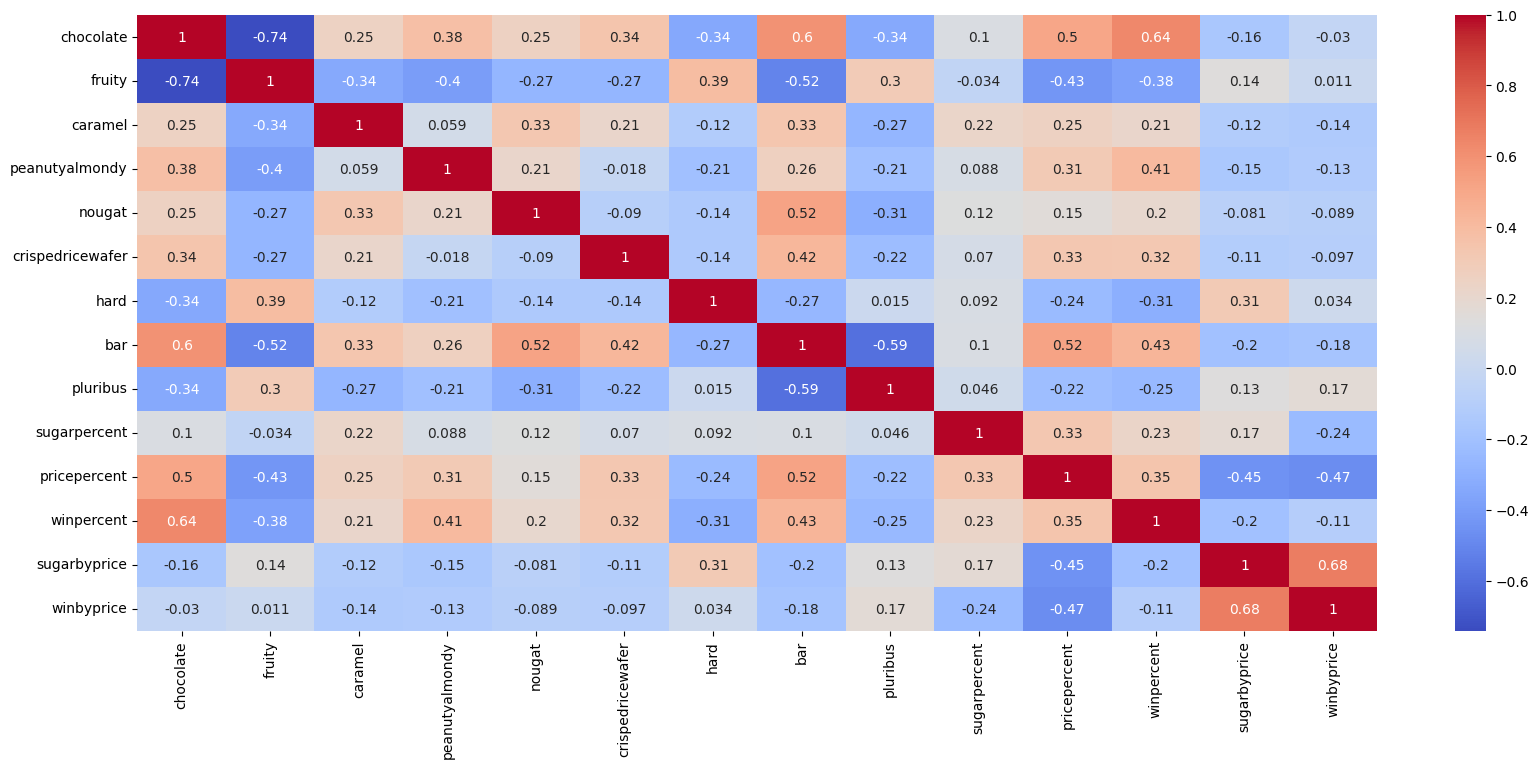

In [16]:
# Selecionar apenas as colunas numéricas
numeric_data = candy_rank.select_dtypes(include=['float64', 'int64'])

# Gerar o heatmap com os dados numéricos
plt.figure(figsize=(20,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

#Aplicação de algoritmos de machine learning para realizar a tarefa de Regressão

##Regressão Linear Ridge
##Decision Tree
## Random Forest


Nesta seção, aplicaremos três algoritmos de machine learning para realizar a tarefa de regressão com o conjunto de dados `candy_rank`.


Os algoritmos escolhidos são Regressão Linear, Árvore de Decisão Regressora e Random Forest Regressor. Após o treinamento e validação de cada modelo, avaliaremos os resultados com métricas apropriadas, como erro absoluto médio (MAE) e R², para determinar o desempenho de cada algoritmo.


Ao final, indicaremos qual modelo apresentou o melhor desempenho na previsão da variável alvo.



  Adição de bibliotecas necessárias para o nosso treinamento de dados.

In [17]:
# Importação de bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error




X contém as características do conjunto de dados candy_rank, excluindo as colunas competitorname, winpercent, sugarpercent, pricepercent, sugarbyprice e winbyprice.


y é a variável alvo, que é a coluna winpercent

MinMaxScaler para normalizar os dados em X, transformando os valores para um intervalo entre 0 e 1


sa train_test_split para separar os dados escalados em conjuntos de treinamento e teste. 80% dos dados são usados para treino (X_train, y_train), e 20% são reservados para teste (X_test, y_test)

In [18]:
# Definir X e y
X = candy_rank.drop(['competitorname', 'winpercent', 'sugarpercent', 'pricepercent', 'sugarbyprice', 'winbyprice'], axis=1)
y = candy_rank['winpercent']

#fica em x chocolate	fruity	caramel	peanutyalmondy	nougat	crispedricewafer	hard	bar	pluribus

# Escalar as variáveis
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Calcula o erro absoluto médio **(mae_ridge)** e o erro quadrático médio **(mse_ridge)** comparando as previsões (y_pred_ridge) com os valores reais **(y_test)**.

In [19]:
# Regressão Linear (Ridge)
ridge = Ridge(alpha=1)  #cria um objeto do modelo de regressão Ridge com um valor específico de alpha, que controla a força da regularização
ridge.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_ridge = ridge.predict(X_test) # Utiliza o modelo treinado para fazer previsões sobre o conjunto de teste (X_test).

# Avaliação
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression - MAE: {mae_ridge}, MSE: {mse_ridge}")


Ridge Regression - MAE: 0.10487934854262222, MSE: 0.01623266058367211


In [20]:
# Árvore de Decisão Regressor
tree = DecisionTreeRegressor(random_state=42) #nstancia um modelo de DecisionTreeRegressor, definindo uma semente aleatória (random_state) para garantir a reprodutibilidade.

tree.fit(X_train, y_train)#ajusta o modelo aos dados de treinamento (X_train e y_train) para aprender a relação entre as variávei

# Gera Previsões no conjunto de teste
y_pred_tree = tree.predict(X_test)

# Avaliação Calcula e exibe os erros absolutos médios (MAE) e quadráticos médios (MSE) das previsões em comparação com os valores reais.
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree Regression - MAE: {mae_tree}, MSE: {mse_tree}")


Decision Tree Regression - MAE: 0.12249747265837103, MSE: 0.021374408382463215


In [21]:
# Random Forest Regressor
forest = RandomForestRegressor(random_state=42, n_estimators=100) # Instancia um modelo de Random Forest Regressor, definindo o número de árvores (n_estimators)
# cria semente aleatória (random_state) para garantir a reprodutibilidade.


forest.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_forest = forest.predict(X_test)

# Avaliação
mae_forest = mean_absolute_error(y_test, y_pred_forest) #Calcula e exibe os erros absolutos médios (MAE) e quadráticos médios (MSE) das previsões em comparação com os valores reais.
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f"Random Forest Regression - MAE: {mae_forest}, MSE: {mse_forest}")


Random Forest Regression - MAE: 0.11160959109864449, MSE: 0.018384018050170627


Avaliação do erro absoluto médio **(mae_ridge)** e o erro quadrático médio **(mse_ridge)**

In [22]:
# Comparar MAE e MSE dos três modelos
print(f"Ridge Regression - MAE: {mae_ridge}, MSE: {mse_ridge}")
print(f"Decision Tree Regression - MAE: {mae_tree}, MSE: {mse_tree}")
print(f"Random Forest Regression - MAE: {mae_forest}, MSE: {mse_forest}")


Ridge Regression - MAE: 0.10487934854262222, MSE: 0.01623266058367211
Decision Tree Regression - MAE: 0.12249747265837103, MSE: 0.021374408382463215
Random Forest Regression - MAE: 0.11160959109864449, MSE: 0.018384018050170627


#PCA

Para aplicar machine learning para realizar a tarefa de Clusterização. Usaremos PCA em ambos para  diminuir a dimensão usada para transformar um conjunto menor, mas com alta variabilidade

Fazendo a importação do PCA com estados de randomizição e dropando a coluna compertiotorname


 **variância explicada indica a quantidade de informação dos dados que é capturada por cada componente em uma análise de PCA.**

In [23]:
from sklearn.decomposition import PCA # import.
pca = PCA(svd_solver='randomized', random_state=123) #instantiate.
pca.fit(candy_rank.drop('competitorname', axis=1)) # fit.

PCA(random_state=123, svd_solver='randomized')

**Primeiro gráfico:** Mostra a variância explicada por cada componente principal do PCA.

**Segundo gráfico:** Mostra a variância explicada acumulada à medida que o número de componentes aumenta.

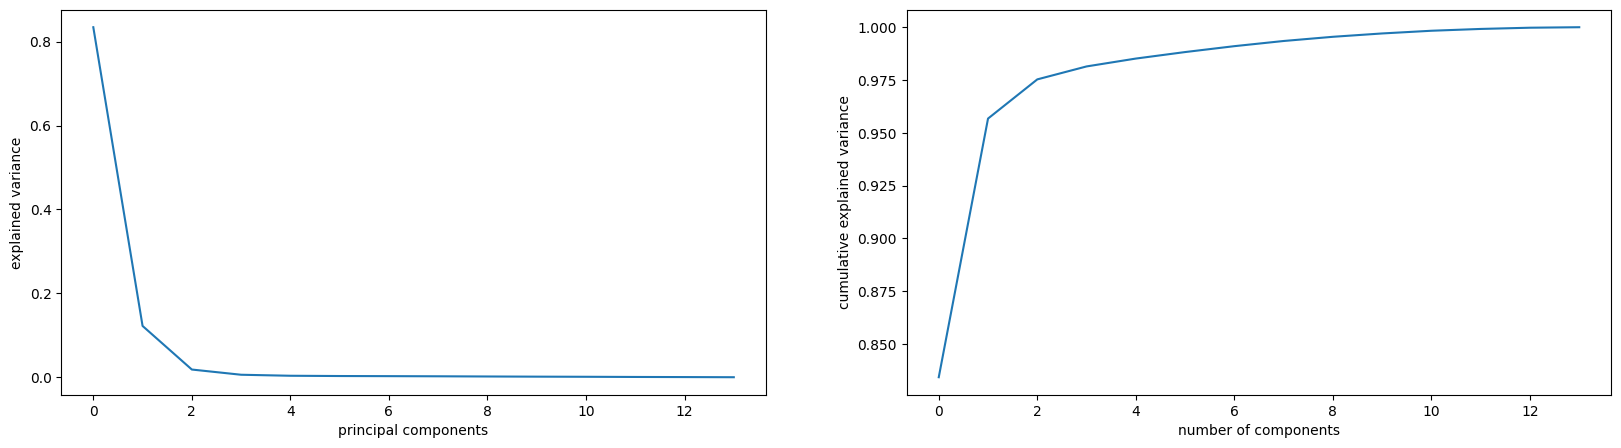

In [24]:
# Fazendo o screeplot - traçando a variação acumulativa em relação ao número de componentes

fig = plt.figure(figsize = (20,5))
ax = plt.subplot(121)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('principal components')
plt.ylabel('explained variance')

ax2 = plt.subplot(122)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

Calcula e retorna a soma da variância explicada pelos primeiros 2, 3 e 4 componentes principais do PCA, arredondada para 3 casas decimais.

In [25]:
(pca.explained_variance_ratio_[0:2].sum().round(3),
pca.explained_variance_ratio_[0:3].sum().round(3),
pca.explained_variance_ratio_[0:4].sum().round(3))

(0.957, 0.975, 0.981)

Cria um novo dataframe **candy_rank_pca_2_comp** contendo dois primeiros componentes principais (PC1 e PC2) e dropando a coluna competitorname

In [26]:
candy_rank_pca_2_comp = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':candy_rank.drop('competitorname', axis=1).columns})

O gráfico mostra como as variáveis originais contribuem para os dois primeiros componentes principais da PCA, com cada ponto representando uma variável e seus nomes.

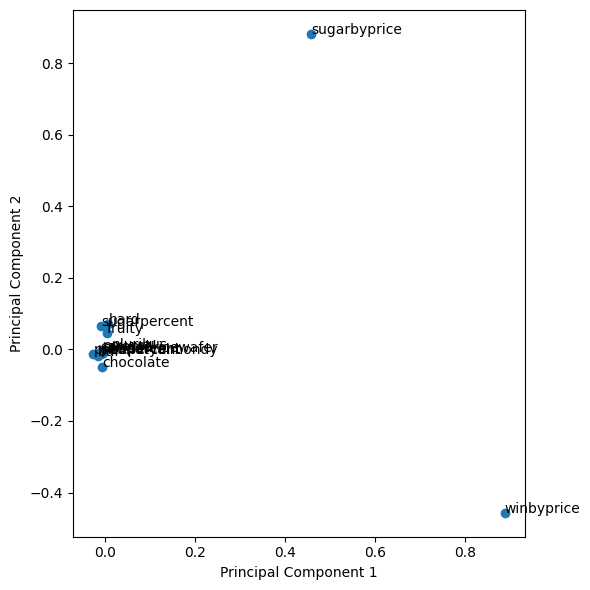

In [27]:
# podemos visualizar o que os componentes principais parecem capturar.

fig = plt.figure(figsize = (6,6))
plt.scatter(candy_rank_pca_2_comp.PC1, candy_rank_pca_2_comp.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(candy_rank_pca_2_comp.Feature):
    plt.annotate(txt, (candy_rank_pca_2_comp.PC1[i],candy_rank_pca_2_comp.PC2[i]))
plt.tight_layout()
plt.show()

In [28]:
candy_rank_pca = pca.transform(candy_rank.drop('competitorname', axis=1)) # nossos dados foram transformados com novos recursos como componentes principais.
candy_rank_pca = candy_rank_pca[:, 0:2] # Uma vez que exigimos apenas os dois primeiros componentes principais.

O código aplica padronização aos dados de PCA (candy_rank_pca), ajustando a média para 0 e a variância para 1 (normalização), usando o StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
candy_rank_scaler = standard_scaler.fit_transform(candy_rank_pca) # scaler em candy_rank_scaler significa escalado.

Abaixo estão os gráficos de dispersão e histogramas para visualizar relações e distribuições entre as variáveis padronizadas em candy_rank_scaler

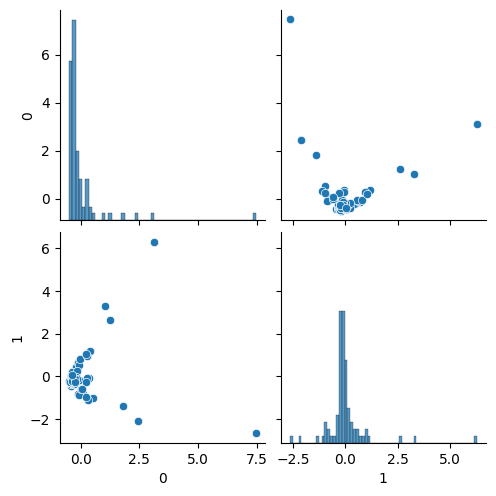

In [30]:
sns.pairplot(pd.DataFrame(candy_rank_scaler)) # Tente obter alguma intuição dos dados.


A função **Hopkins** calcula o índice de Hopkins, que mede a tendência de agrupamento dos dados. O valor varia de 0 (distribuição aleatória) a 1 (alta concentração de clusters). É usado para avaliar se os dados possuem uma estrutura de agrupamento.

In [31]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

O código define a função hopkins(X), que calcula o índice de Hopkins para um conjunto de dados
𝑋
X. Este índice mede a aleatoriedade dos dados, ajudando a determinar se os pontos estão agrupados ou distribuídos aleatoriamente. O cálculo envolve:

**Inicialização:** Obtém o número de colunas (
𝑑
d) e linhas (
𝑛
n) do conjunto de dados.


**Amostragem:** Seleciona uma amostra aleatória de
10
%
10% das linhas.


**Cálculo de Distâncias**: Para cada ponto da amostra, calcula a distância até os pontos mais próximos no espaço aleatório (distribuição uniforme) e nos dados originais.


**Cálculo do Índice de Hopkins:** Retorna o índice, que varia de
0
0 (distribuição aleatória) a
1
1 (alta concentração de pontos).

In [32]:
def hopkins(X):
    d = X.shape[1] #colunas
    n = len(X) # linhas
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

O valor retornado representa o índice de Hopkins, que indica a tendência dos dados a formar clusters:

**Valor próximo de 0:** Os dados estão distribuídos aleatoriamente, sem estrutura de agrupamento.

**Valor próximo de 1**: Os dados apresentam uma alta concentração em clusters, sugerindo que existe uma estrutura de agrupamento significativa.

In [33]:
hopkins(pd.DataFrame(candy_rank_scaler))


0.9717212243509069

#KMEANS

In [34]:
from sklearn.cluster import KMeans # importação # pontuações de silhueta para escolher o número de clusters.
from sklearn.metrics import silhouette_score

Define a variavel de silhueta de score para calcula a pontuação de silhueta para diferentes números de clusters.

sse_ para armazenar o número de clusters (k) e suas respectivas pontuações de silhueta.

Aplica o algoritmo K-Means com k clusters nos dados escalados (candy_rank_scaler).

Por fim salva os valores dos scores e plota o grafico com os mesmos

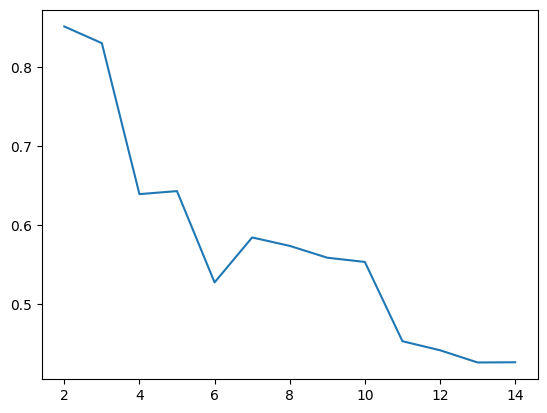

In [35]:
def sil_score(candy_rank):
    sse_ = []
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k, random_state=123).fit(candy_rank_scaler) # fit.
        sse_.append([k, silhouette_score(candy_rank, kmeans.labels_)])
    plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

sil_score(candy_rank_scaler)

Calcula a Inércia: Para cada número de clusters de 1 a 18, ajusta um modelo KMeans e armazena a soma dos quadrados das distâncias (inércia) e depois plota os resultados

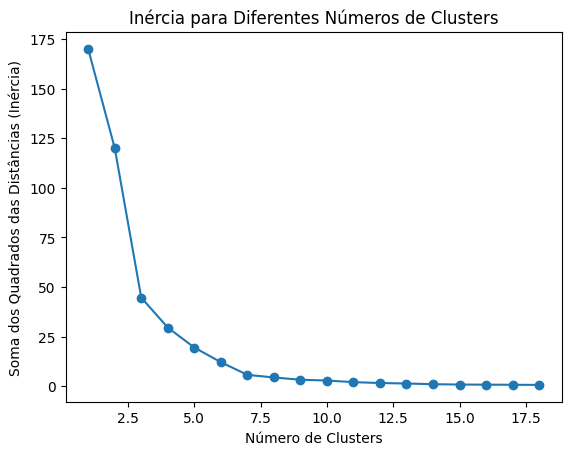

In [36]:
def plot_ssd(candy_rank):
    ssd = []
    for num_clusters in range(1, 19):
        model_clus = KMeans(n_clusters=num_clusters, max_iter=50, random_state=123)
        model_clus.fit(candy_rank)
        ssd.append(model_clus.inertia_)

    plt.plot(range(1, 19), ssd, marker='o')  # Plota a inércia em função do número de clusters
    plt.xlabel('Número de Clusters')  # Rótulo para o eixo X
    plt.ylabel('Soma dos Quadrados das Distâncias (Inércia)')  # Rótulo para o eixo Y
    plt.title('Inércia para Diferentes Números de Clusters')  # Título do gráfico
    plt.show()  # Exibe o gráfico

plot_ssd(candy_rank_scaler)


Abaixo iremos cria um modelo de KMeans com 2 clusters e um máximo de 50 iterações. Em seguida, ajusta (treina) o modelo usando os dados escalados

In [37]:
km2c = KMeans(n_clusters=2, max_iter=50, random_state=93)
km2c.fit(candy_rank_scaler)

KMeans(max_iter=50, n_clusters=2, random_state=93)

Cria uma cópia do DataFrame candy_rank e a armazena em candy_rank_dummy.
Concatena os rótulos dos clusters, combina candy_rank_dummy. resultando em um novo DataFrame candy_rank_km2c

 Renomeia a coluna que contém os rótulos dos clusters para "Cluster ID"

In [38]:
candy_rank_dummy = pd.DataFrame.copy(candy_rank)
candy_rank_km2c = pd.concat([candy_rank_dummy, pd.Series(km2c.labels_)], axis=1)
candy_rank_km2c.rename(columns={0:'Cluster ID'}, inplace=True)


A linha renomeia as colunas do DataFrame candy_rank_km2c para "PC1", "PC2" e "Cluster ID"

In [39]:
candy_rank_dummy = pd.DataFrame.copy(pd.DataFrame(candy_rank_scaler))
candy_rank_km2c = pd.concat([candy_rank_dummy, pd.Series(km2c.labels_)], axis=1)
candy_rank_km2c.columns = ['PC1', 'PC2', 'Cluster ID']

O gráfico de dispersão que mostra a relação entre as variáveis "PC1" e "PC2" no DataFrame candy_rank_km2c. A variável hue='Cluster ID' é utilizada para colorir os pontos de acordo com os diferentes clusters identificados

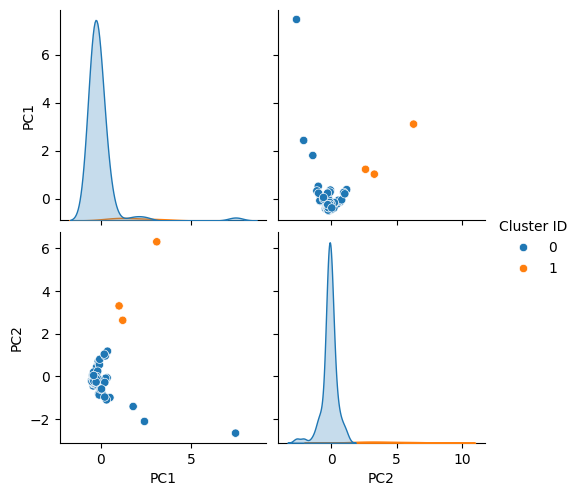

In [40]:
sns.pairplot(data=candy_rank_km2c, vars=['PC1', 'PC2'], hue='Cluster ID')

Inicializando um novo cluster com 5 clusters para o KMEANS com no maximo 50 interações e garantindo a randomidade entre eles com seu estado de interação de 123

In [41]:
km5c = KMeans(n_clusters=5, max_iter=50, random_state=123)
km5c.fit(candy_rank_scaler)

KMeans(max_iter=50, n_clusters=5, random_state=123)

cria uma cópia do DataFrame candy_rank chamada candy_rank_dummy, em seguida, concatena essa cópia com uma série que contém os rótulos dos clusters obtidos com o modelo km5c. O resultado é armazenado em candy_rank_km2c

In [42]:
candy_rank_dummy = pd.DataFrame.copy(candy_rank)
candy_rank_km2c = pd.concat([candy_rank_dummy, pd.Series(km5c.labels_)], axis=1)
candy_rank_km2c.rename(columns={0:'Cluster ID'}, inplace=True)

Copia os dados escalados em seguida concatena rótulos de cluster e por fim renomeia as colunas do novo DataFrame para PC1, PC2, e Cluster ID

In [43]:
candy_rank_dummy = pd.DataFrame.copy(pd.DataFrame(candy_rank_scaler))
candy_rank_pcakm2c = pd.concat([candy_rank_dummy, pd.Series(km5c.labels_)], axis=1)
candy_rank_pcakm2c.columns = ['PC1', 'PC2', 'Cluster ID']

In [44]:
print(candy_rank_pcakm2c.columns)


Index(['PC1', 'PC2', 'Cluster ID'], dtype='object')


  Gráfico de dispersão: Cria um gráfico de dispersão (scatter plot) para as variáveis especificadas (PC1 e PC2), mostrando a relação entre essas duas componentes principais

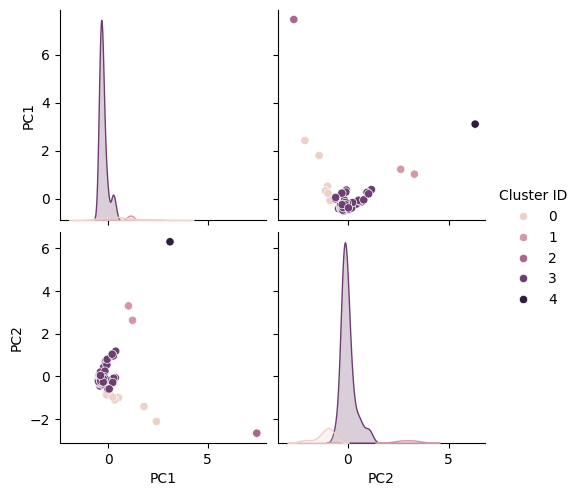

In [45]:
sns.pairplot(data=candy_rank_pcakm2c, vars=['PC1', 'PC2'], hue='Cluster ID')


Código calcula a média de cada variável numérica dentro de cada cluster

In [46]:
candy_rank_km2c.groupby('Cluster ID').mean(numeric_only=True)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
Cluster ID,,,,,,,,,,,,,,
0,0.25,0.50,0.00,0.12,0.0,0.0,0.12,0.00,0.62,0.07,0.11,0.50,1.37,6.78
1,0.00,0.50,0.00,0.00,0.0,0.0,1.00,0.00,1.00,0.65,0.06,0.32,10.21,5.13
2,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,1.00,0.17,0.01,0.46,15.82,41.58
3,0.47,0.44,0.19,0.18,0.1,0.1,0.15,0.29,0.49,0.52,0.53,0.51,1.24,1.30
4,0.00,1.00,0.00,0.00,0.0,0.0,1.00,0.00,0.00,0.73,0.03,0.39,21.53,11.61


Abaixo iremos remover do DataFrame as linhas pertencentes ao cluster com ID 0

In [47]:
candy_rank_km2c[candy_rank_km2c['Cluster ID']!=0]


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice,Cluster ID
0,100 Grand,1,0,1,0,0,1,0,1,0,0.73,0.86,0.67,0.85,0.78,3
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.60,0.51,0.68,1.18,1.32,3
3,One quarter,0,0,0,0,0,0,0,0,0,0.01,0.51,0.46,0.02,0.90,3
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,0.52,1.77,1.02,3
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.47,0.77,0.50,0.61,0.66,3
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.60,0.77,0.57,0.79,0.74,3
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.31,0.51,0.23,0.61,0.46,3
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.91,0.32,0.38,2.79,1.17,3
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.60,0.32,0.35,1.86,1.06,3
10,Charleston Chew,1,0,0,0,1,0,0,1,0,0.60,0.51,0.39,1.18,0.76,3


Em seguida iremos converter a coluna 'Cluster ID' para uma variável binária onde 1 representa clusters diferentes de 0 e 0 permanece o mesmo

In [48]:
candy_rank_km2c['Cluster ID'] = candy_rank_km2c['Cluster ID'].map(lambda x: 1 if (x!=0) else 0)


In [49]:
candy_rank_km2c.groupby('Cluster ID').mean(numeric_only=True)


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
Cluster ID,,,,,,,,,,,,,,
0,0.25,0.50,0.00,0.12,0.00,0.00,0.12,0.00,0.62,0.07,0.11,0.5,1.37,6.78
1,0.45,0.44,0.18,0.17,0.09,0.09,0.18,0.27,0.51,0.52,0.51,0.5,1.93,2.05


Exclui colunas desnecessárias para a previsão de X (variáveis independentes).

Define X como as variáveis preditoras e y como a variável alvo (winpercent).

Usa o MinMaxScaler para normalizar os valores de X entre 0 e 1.

In [50]:
# Remover colunas irrelevantes para a previsão e definir X e y
X = candy_rank.drop(['competitorname', 'winpercent', 'sugarpercent', 'pricepercent', 'sugarbyprice', 'winbyprice'], axis=1)
y = candy_rank['winpercent']

# Escalar as variáveis usando MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_scaled = minmax_scaler.fit_transform(X)  # Aplicar a escala aos dados X



Iremos criar um modelo de Regressão Ridge usando o Ridge() da biblioteca linear_model com um parâmetro de semente aleatória (random_state=123)

In [51]:
# Importando o modelo Ridge
from sklearn import linear_model
lr_rdg = linear_model.Ridge(random_state=123)  # Instanciando o modelo

realiza uma busca por hiperparâmetros para o modelo de Regressão Ridge (lr_rdg) usando validação cruzada.

Usamos o GridSearchCV para testar diferentes valores de alpha (coeficiente de regularização)

avalia o desempenho do modelo com base no erro absoluto médio negativo (neg_mean_absolute_error).

Por fim busca ajusta o melhor modelo com os dados escalados.

In [52]:
# Definindo os hiperparâmetros
from sklearn.model_selection import GridSearchCV
hyperparameters = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Realizando a busca por grid com validação cruzada (cross-validation), incluindo o retorno dos scores de treino
model_cv = GridSearchCV(estimator=lr_rdg, param_grid=hyperparameters, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)

# Ajustando o modelo com os dados escalados
model_cv.fit(X_scaled, y)



GridSearchCV(cv=10, estimator=Ridge(random_state=123),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error')

Converte os resultados da busca de hiperparâmetros do GridSearchCV para um DataFrame

ajusta os valores de alpha para o tipo float32

plota os erros médios absolutos negativos de treino e teste em função dos valores de alpha.

O gráfico gerado ajuda a visualizar como a variação de alpha afeta o desempenho do modelo.

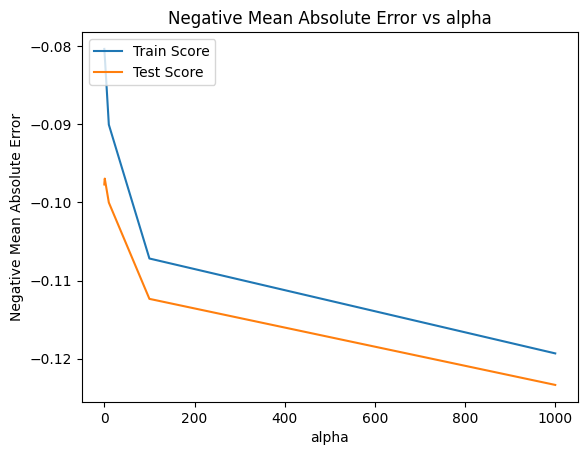

In [53]:
# Convertendo os resultados do GridSearch para um DataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)

# Convertendo os parâmetros alpha para tipo float32
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotando os resultados de treino e teste em função de alpha
import matplotlib.pyplot as plt
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train Score')  # Mean train score
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test Score')  # Mean test score
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error vs alpha")
plt.legend(loc='upper left')
plt.show()





Retorna os melhores hiperparâmetros encontrados durante o processo de busca por hiperparâmetros (GridSearchCV)

Alpha regula o equilíbrio entre o ajuste do modelo e sua capacidade de generalização, controlando o quão fortemente o modelo deve penalizar os coeficientes

In [54]:
# Obtendo o melhor valor do parametro alpha
model_cv.best_params_



{'alpha': 1}

Configura e treina um modelo de regressão Ridge com o hiperparâmetro de regularização otimizado

In [55]:
# Definindo o valor de alpha encontrado
alpha = model_cv.best_params_['alpha']

# Ajustando o modelo Ridge com o alpha ideal
ridge = linear_model.Ridge(alpha=alpha)
ridge.fit(X_scaled, y)



Ridge(alpha=1)

 O intercepto representa o valor previsto da variável dependente (y) quando todas as variáveis independentes (X) são zero.

Em relação ao valor:

Perto de zero: Sugere que a previsão do modelo tende a ser próxima de zero quando as variáveis independentes não influenciam.
Próximo de um: Indica que, quando todas as variáveis independentes são zero, o modelo prevê um valor de 1.

In [56]:
# Exibindo o termo constante (intercepto)
ridge.intercept_


0.372788599057167

O for percorre cada feature e seu respectivo coeficiente, multiplicando o coeficiente por 100 para expressá-lo em porcentagem.

A saída mostra como cada feature influencia a previsão do modelo, coeficientes positivos indicam uma relação direta (aumentos na feature aumentam a previsão), enquanto coeficientes negativos indicam uma relação inversa.

In [57]:
# Exibindo os coeficientes do modelo para cada feature
for feature, coef in zip(X.columns, ridge.coef_):
    print(f'{feature}: {coef * 100}')


chocolate: 17.395113450849355
fruity: 7.720639686401813
caramel: 2.907233687069858
peanutyalmondy: 9.094281846468235
nougat: 1.3764952562193944
crispedricewafer: 7.301821467840014
hard: -4.442497827630219
bar: 0.7309590882068199
pluribus: -0.14235867560122065


#DBSCAN

Impotação de bibliotecas necessárias para implementação do DBSCAN, medidas metricas de desempenho como silhoette score e normalização de dados com MinMaxScaler

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler



Normalização os dados, garantindo que todas as variáveis fiquem entre 0 e 1.

In [59]:
# Normalização
scaler = MinMaxScaler()
candy_rank_scaled = scaler.fit_transform(candy_rank.drop('competitorname', axis=1))






*   PCA: Reduz os dados originais para 2 componentes principais  (PC1 e PC2).

*   DBSCAN: Aplica o algoritmo de clusterização com parâmetros eps=0.5 e min_samples=5.

* Usa eps=0.5 (distância máxima para considerar dois pontos no mesmo cluster) e min_samples=5 (número mínimo de pontos para formar um cluster).

* Clusters: Adiciona os rótulos de clusters gerados pelo DBSCAN ao DataFrame, com as colunas 'PC1', 'PC2' e 'Cluster ID'. O campo Cluster ID contém os rótulos que identificam a qual cluster cada ponto pertence, ou se foi classificado como ruído.


In [60]:
# PCA para reduzir para 2 componentes principais
pca = PCA(n_components=2)
candy_rank_pca = pca.fit_transform(candy_rank_scaled)

# DBSCAN com parâmetros iniciais
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(candy_rank_pca)

# Adicionando os clusters ao dataframe
candy_dbscan = pd.DataFrame(candy_rank_pca, columns=['PC1', 'PC2'])
candy_dbscan['Cluster ID'] = dbscan.labels_


Calcula a variância explicada por cada componente principal após aplicar o PCA.

Soma cumulativamente a variância explicada para gerar a variância acumulada

 Mostra o número de componentes principais no eixo X e a variância acumulada no eixo Y, indicando quantos componentes são necessários para explicar uma porcentagem significativa da variância.


 GRAFICO LINHA CRESCENTE: indica que a variância explicada pelos componentes principais está aumentando de maneira constante com cada componente adicionado.


 **variância explicada indica a quantidade de informação dos dados que é capturada por cada componente em uma análise de PCA.**

 O valor que informa quão confiável um modelo que descreve um fenômeno observado parece ser. A variância explicada mostra quanto dessas diferenças nas escolhas podem ser explicadas pelas características que você está analisando

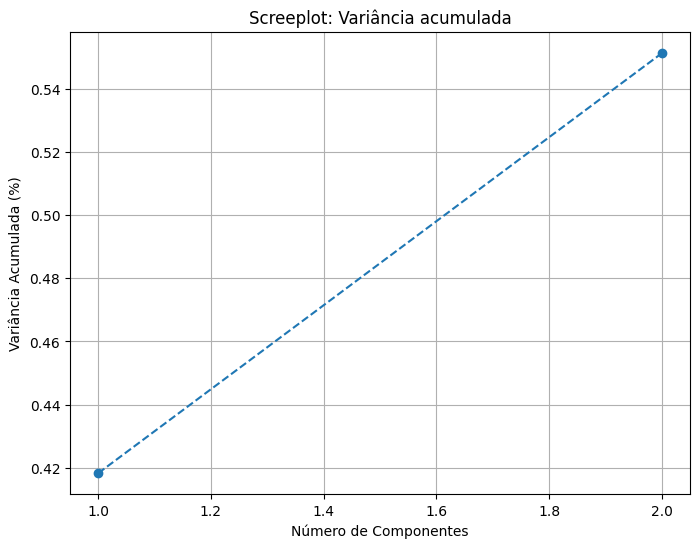

In [61]:
# Variância explicada para cada componente
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot do screeplot
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Screeplot: Variância acumulada')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada (%)')
plt.grid(True)
plt.show()


Apresentação da visualização como os dados foram agrupados em clusters após a aplicação do DBSCAN com os dados reduzidos pelo PCA

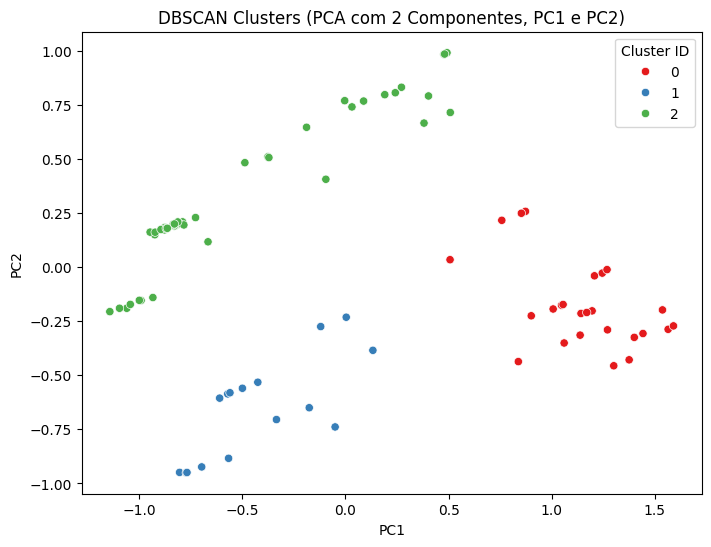

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster ID', data=candy_dbscan, palette='Set1', legend='full')
plt.title('DBSCAN Clusters (PCA com 2 Componentes, PC1 e PC2)')
plt.show()


* X_train e X_test dividem os dados escalados (candy_rank_scaled) em 70% para treino e 30% para teste.

* é fixado em 5, determinando o número mínimo de pontos necessários para formar um cluster

*  cria uma faixa de valores de epsilon (0.1 a 1.0), que serão usados para testar diferentes distâncias de vizinhança no algoritmo DBSCAN.

In [63]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em treino e teste
X_train, X_test = train_test_split(candy_rank_scaled, test_size=0.3, random_state=42)

# Fixar min_samples e variar eps
min_samples = 5  # valor fixo
eps_values = np.arange(0.1, 1.0, 0.1)  # valores de eps em intervalos menores para suavizar a linha


In [64]:
# Cria duas listas vazias, train_scores e test_scores, para armazenar os resultados de desempenho do modelo durante o treinamento e o teste.
train_scores = []
test_scores = []


* O for é definido parâmetro eps define o raio máximo para considerar um ponto vizinho no DBSCAN. O código varia eps de 0.1 a 0.9 (definido por eps_values) (epsilon)

* Para cada valor de eps, o DBSCAN é ajustado (treinado) no conjunto de dados de treino (X_train) e aplicado no conjunto de teste (X_test)

* O silhouette score mede a qualidade dos clusters formados, avaliando o quão bem as instâncias estão agrupadas e o quão distintas estão em relação a outros clusters.

* As pontuações de silhouette tanto para o conjunto de treino quanto para o conjunto de teste são armazenadas nas listas train_scores e test_scores, respectivamente. Se não houver múltiplos clusters, um NaN é salvo



In [65]:
# Loop pelos parâmetros para calcular os silhouette scores
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Ajustar DBSCAN no conjunto de treino
    train_labels = dbscan.fit_predict(X_train)
    test_labels = dbscan.fit_predict(X_test)

    # Apenas calcular silhouette se houver mais de 1 cluster
    if len(set(train_labels)) > 1:
        train_score = silhouette_score(X_train, train_labels)
        train_scores.append(train_score)
    else:
        train_scores.append(np.nan)

    if len(set(test_labels)) > 1:
        test_score = silhouette_score(X_test, test_labels)
        test_scores.append(test_score)
    else:
        test_scores.append(np.nan)

* Gera um gráfico que compara os Silhouette Scores para conjuntos de treinamento e teste em relação a diferentes valores do parâmetro eps do DBSCAN

* Eixo X: Valores de eps.

* Eixo Y: Silhouette Scores (medida de qualidade dos clusters).

*  Inicialmente, um aumento no valor de eps pode levar a uma melhor formação dos clusters, resultando em scores mais altos. Estabilização: Após um certo ponto, o aumento de eps pode não melhorar mais a separação dos clusters, fazendo os scores se estabilizarem.

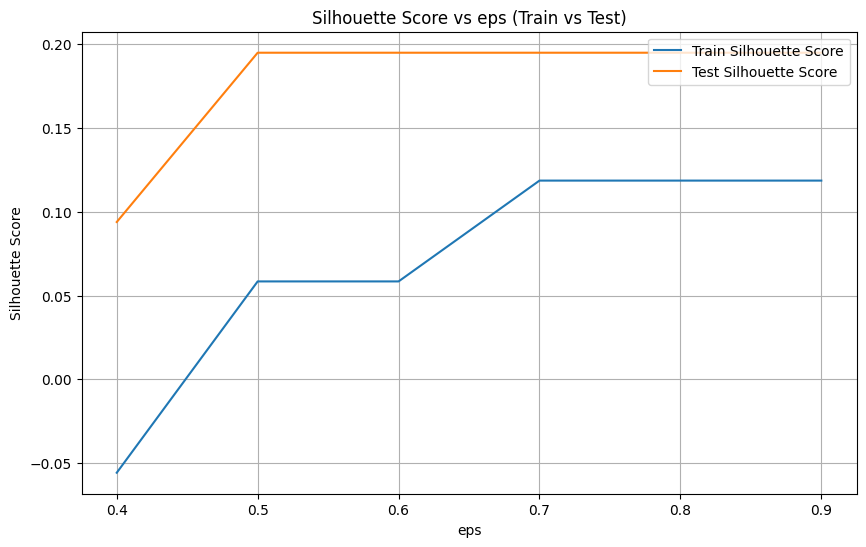

In [66]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(eps_values, train_scores, label='Train Silhouette Score')
plt.plot(eps_values, test_scores, label='Test Silhouette Score')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs eps (Train vs Test)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Abaixo o loop testa diferentes combinações de valores para os parâmetros eps e min_samples do algoritmo DBSCAN, ajustando o modelo nos dados candy_rank_pca e calculando o Silhouette Score para avaliar a qualidade dos clusters gerados

* Loop Externo: Itera sobre três valores de eps (0.3, 0.5, 0.7).

* Loop Interno: Para cada valor de eps, itera sobre três valores de min_samples (3, 5, 7).

* Ajuste do DBSCAN: Para cada combinação de eps e min_samples, o DBSCAN é ajustado aos dados.

A melhor combinação de resultados apresentada é:

eps: 0.3, min_samples: 7, com Silhouette Score: 0.6027.  Representa a distância máxima entre dois pontos para que eles sejam considerados parte do mesmo cluster. Indica o número mínimo de pontos (ou amostras) necessários para formar um cluster.

In [67]:
# Loop para testar diferentes valores de eps e min_samples
for eps in [0.3, 0.5, 0.7]:
    for min_samples in [3, 5, 7]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(candy_rank_pca)

        # Calculando Silhouette Score
        if len(set(labels)) > 1:  # Apenas calcula o silhouette se houver mais de 1 cluster
            sil_score = silhouette_score(candy_rank_pca, labels)
            print(f'eps: {eps}, min_samples: {min_samples}, Silhouette Score: {sil_score}')


eps: 0.3, min_samples: 3, Silhouette Score: 0.5612337990542909
eps: 0.3, min_samples: 5, Silhouette Score: 0.6011937675158885
eps: 0.3, min_samples: 7, Silhouette Score: 0.6026692644797952
eps: 0.5, min_samples: 3, Silhouette Score: 0.5011644381339757
eps: 0.5, min_samples: 5, Silhouette Score: 0.5011644381339757
eps: 0.5, min_samples: 7, Silhouette Score: 0.5011644381339757


In [68]:
# GridSearch para encontrar o melhor alpha
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

#treinamento para encontrar um hiperparemetro

Remoção de colunas irrelevantes e escolonamento de dados utilizando o MinMaxScaler, que transforma os dados para um intervalo entre 0 e 1.
O resultado do escalonamento é atribuído à variável X_scaled, preparando os dados para a modelagem, o que pode melhorar a performance de muitos algoritmos de machine learning.

In [69]:

# Remover colunas irrelevantes e definir X e y
X = candy_rank.drop(['competitorname', 'winpercent', 'sugarpercent', 'pricepercent', 'sugarbyprice', 'winbyprice'], axis=1)
y = candy_rank['winpercent']

# Escalando os dados
X_scaled = MinMaxScaler().fit_transform(X)


Abaixo iremos configurar e executar uma busca em grade para otimizar os hiperparâmetros do modelo de regressão Ridge, utilizando validação cruzada para encontrar a melhor penalização (valor de alpha) que minimize o erro absoluto médio nas previsões

In [70]:
lr_rdg = linear_model.Ridge(random_state=123)
hyperparameters = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
model_cv = GridSearchCV(estimator=lr_rdg, param_grid=hyperparameters, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
model_cv.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=Ridge(random_state=123),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error')

Em seguida iremos inicializar e ajustar um modelo de regressão Ridge com o melhor hiperparâmetro de regularização (alpha) encontrado anteriormente, preparando o modelo para previsões futuras.

In [71]:
# Melhor alpha e ajuste do modelo
alpha = model_cv.best_params_['alpha']
ridge = linear_model.Ridge(alpha=alpha)
ridge.fit(X_scaled, y)

Ridge(alpha=1)

o ponto onde a linha de regressão intercepta o eixo y no gráfico

Ele ajuda a interpretar como o modelo se comporta em relação ao valor médio da variável de saída, especialmente quando as variáveis independentes têm valores baixos ou nulos.

In [72]:
# Exibindo o termo constante (intercepto)
ridge.intercept_


0.372788599057167

Por fim, fornece uma visão geral dos parâmetros do modelo, ajudando a interpretar como cada variável influencia a saída prevista.

In [73]:
# Exibir intercepto e coeficientes
print(f"Intercepto: {ridge.intercept_}")
for feature, coef in zip(X.columns, ridge.coef_):
    print(f'{feature}: {coef * 100}')

Intercepto: 0.372788599057167
chocolate: 17.395113450849355
fruity: 7.720639686401813
caramel: 2.907233687069858
peanutyalmondy: 9.094281846468235
nougat: 1.3764952562193944
crispedricewafer: 7.301821467840014
hard: -4.442497827630219
bar: 0.7309590882068199
pluribus: -0.14235867560122065


#Avaliação Final dos resultados dos dois algoritmos de clusterização e indicar qual foi o melhor

In [74]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


As variáveis kmeans_labels e dbscan_labels armazenam os resultados de agrupamento de cada método, permitindo comparar ou analisar as atribuições de cluster de diferentes algoritmos.

In [75]:
kmeans_labels = candy_rank_km2c['Cluster ID']  # Labels do KMeans
dbscan_labels = candy_dbscan['Cluster ID']  # Labels do DBSCAN

Iremos calcular e imprimr as métricas

* Silhouette

* Davies-Bouldin

* Calinski-Harabasz

Para avaliar a qualidade dos clusters gerados pelo algoritmo K-Means e DBSCAN. Cada uma dessas métricas fornece uma perspectiva diferente sobre a formação dos clusters, ajudando a determinar o quão bem os dados foram agrupados.

para o modelo **K-Means**, permitindo avaliar a qualidade do agrupamento realizado

In [76]:
# Calcular as métricas para KMeans
kmeans_silhouette = silhouette_score(candy_rank_pca, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(candy_rank_pca, kmeans_labels)
kmeans_calinski_harabasz = calinski_harabasz_score(candy_rank_pca, kmeans_labels)

print(f"KMeans - Silhouette Score: {kmeans_silhouette}")
print(f"KMeans - Davies-Bouldin Index: {kmeans_davies_bouldin}")
print(f"KMeans - Calinski-Harabasz Index: {kmeans_calinski_harabasz}")

KMeans - Silhouette Score: -0.08195058802002343
KMeans - Davies-Bouldin Index: 3.5873961465980364
KMeans - Calinski-Harabasz Index: 1.573559234754428


Iremos calcular e imprimr as métricas

* Silhouette

* Davies-Bouldin

* Calinski-Harabasz

para o modelo **DBSCAN**, permitindo avaliar a qualidade do agrupamento realizado

In [77]:
# Calcular as métricas para DBSCAN
dbscan_silhouette = silhouette_score(candy_rank_pca, dbscan_labels)
dbscan_davies_bouldin = davies_bouldin_score(candy_rank_pca, dbscan_labels)
dbscan_calinski_harabasz = calinski_harabasz_score(candy_rank_pca, dbscan_labels)

print(f"DBSCAN - Silhouette Score: {dbscan_silhouette}")
print(f"DBSCAN - Davies-Bouldin Index: {dbscan_davies_bouldin}")
print(f"DBSCAN - Calinski-Harabasz Index: {dbscan_calinski_harabasz}")


DBSCAN - Silhouette Score: 0.5011644381339757
DBSCAN - Davies-Bouldin Index: 0.7673467313132333
DBSCAN - Calinski-Harabasz Index: 106.30536067381232


Imprime uma comparação final entre K-Means e DBSCAN, identificando qual algoritmo se saiu melhor em cada uma das métricas de avaliação

In [78]:
# Comparação final
print("\nComparação de métricas de avaliação de qualidade de clusters:")
print(f"Melhor Silhouette Score: {'KMeans' if kmeans_silhouette > dbscan_silhouette else 'DBSCAN'} (Maior é melhor)")
print(f"Melhor Davies-Bouldin Index: {'KMeans' if kmeans_davies_bouldin < dbscan_davies_bouldin else 'DBSCAN'} (Menor é melhor)")
print(f"Melhor Calinski-Harabasz Index: {'KMeans' if kmeans_calinski_harabasz > dbscan_calinski_harabasz else 'DBSCAN'} (Maior é melhor)")


Comparação de métricas de avaliação de qualidade de clusters:
Melhor Silhouette Score: DBSCAN (Maior é melhor)
Melhor Davies-Bouldin Index: DBSCAN (Menor é melhor)
Melhor Calinski-Harabasz Index: DBSCAN (Maior é melhor)
